# Computer Vision

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
model_dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64,activation="relu"),
    tf.keras.layers.Dense(units=32,activation="relu"),
    tf.keras.layers.Dense(units=2,activation="softmax")
])
model_dense(tf.ones((2,2)))
model_dense.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (2, 64)                   192       
                                                                 
 dense_1 (Dense)             (2, 32)                   2080      
                                                                 
 dense_2 (Dense)             (2, 2)                    66        
                                                                 
Total params: 2,338
Trainable params: 2,338
Non-trainable params: 0
_________________________________________________________________


In [3]:
2*64+64

192

In [4]:
print("Number of weights:", 2*64+64+64*32+32+32*2+2)

Number of weights: 2338


In [5]:
tf.ones((2,2))

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.]], dtype=float32)>

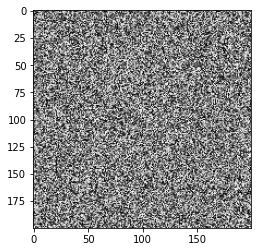

In [6]:
img = np.random.rand(200,200)
plt.imshow(img,cmap="gray")

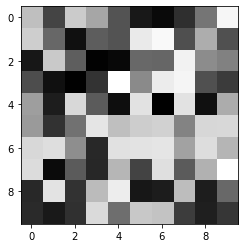

In [7]:
plt.imshow(img[:10,:10],cmap="gray")

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(400,400)),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu")
])

model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 160000)            0         
                                                                 
 dense_3 (Dense)             (None, 128)               20480128  
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 20,489,034
Trainable params: 20,489,034
Non-trainable params: 0
_________________________________________________________________


In [10]:
(200*200)*128+128+128*64+64+64*10+10

5129034

In [11]:
20489034

20489034

# Convolution

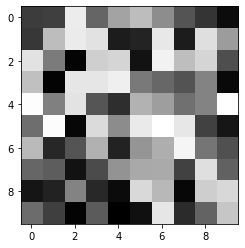

In [12]:
img = np.random.rand(10,10)
plt.imshow(img,cmap="gray")

In [13]:
kernel = np.array([
    [1,1,2,1,1],
    [3,0,0,1,1],
    [1,0,0,1,1]
]) # Strukturni element

(10, 10)
(10, 10)
(10, 10)


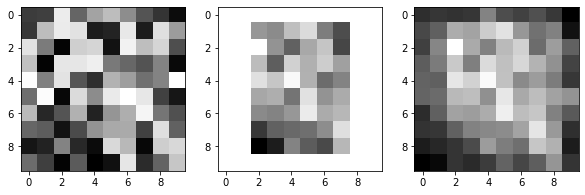

In [14]:
row_shift = kernel.shape[0]//2
column_shift = kernel.shape[1]//2

img_feature_map_valid = np.zeros(img.shape)
img_feature_map_valid[:] = np.nan
img_feature_map_same = np.zeros(img.shape)
img_feature_map_same[:] = np.nan

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        
        # valid
        if i>= row_shift and j>= column_shift and i<img.shape[0]-row_shift and j<img.shape[1]-column_shift:
            row_start = i-row_shift
            row_end = row_start+kernel.shape[0]
            column_start=j-column_shift
            column_end = column_start+kernel.shape[1]
            
            # print(row_start,row_end,column_start,column_end)
            
            current_matrix = img[row_start:row_end,column_start:column_end]
            value = np.sum(kernel*current_matrix)
            img_feature_map_valid[i,j] = value
        
        # same
        current_matrix = np.zeros(kernel.shape)
        for kernel_row, r in enumerate(range(i-row_shift,i+row_shift+1)):
            for kernel_column, c in enumerate(range(j-column_shift,j+column_shift+1)):
                if r>=0 and r<img.shape[0] and c>=0 and c<img.shape[1]:
                    current_matrix[kernel_row,kernel_column] = img[r,c]
        value = np.sum(kernel*current_matrix)
        img_feature_map_same[i,j] = value
        
        
print(img.shape)
print(img_feature_map_valid.shape)
print(img_feature_map_same.shape)


fig, axs = plt.subplots(1,3,figsize=(10,10))
axs[0].imshow(img,cmap="gray")
axs[1].imshow(img_feature_map_valid,cmap="gray")
axs[2].imshow(img_feature_map_same,cmap="gray")

In [15]:
kernel.shape

(3, 5)

# GPU acceleration

In [16]:
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
else:
    print("No GPU available, switching to CPU.")

RuntimeError: Physical devices cannot be modified after being initialized

# Convolution in Keras

In [17]:
from tensorflow import keras
from tensorflow.keras import layers

In [18]:
inputs = keras.Input(shape=(28,28,1))
x = layers.Conv2D(filters=32,kernel_size=3,activation="relu")(inputs)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(filters=64,kernel_size=3,activation="relu")(x)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(filters=128,kernel_size=3,activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10,activation="softmax")(x)

model = keras.Model(inputs = inputs, outputs=outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

In [19]:
32*(3*3)+32

320

In [20]:
3*3*1152

10368

# MNIST dataset

In [21]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [22]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [23]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

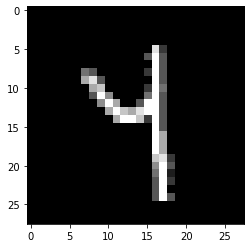

4


In [24]:
n = 1004
plt.imshow(train_images[n,:,:],cmap="gray")
plt.show()
print(train_labels[n])

In [25]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255

In [26]:
model.compile(
    optimizer="adam",
    loss = "sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [27]:
model.fit(train_images, train_labels, epochs=5,batch_size=64)

Epoch 1/5
205/938 [=====>........................] - ETA: 5s - loss: 0.4499 - accuracy: 0.8675

KeyboardInterrupt: 

In [ ]:
test_loss, test_acc = model.evaluate(test_images,test_labels)
test_loss, test_acc

In [ ]:
# https://www.microsoft.com/en-us/download/details.aspx?id=54765

In [ ]:
import os
import shutil
import random
from tqdm.notebook import tqdm

# download from here: https://www.microsoft.com/en-us/download/details.aspx?id=54765

# Set the source directory where the images are stored
src_dir = './keggle/PetImages'

# Set the destination directory where the train, test, and split folders will be created
dest_dir = './keggle'

# Set the percentage of images to use for the test and split folders (the remaining percentage will be used for the train folder)
test_pct = 0.2
split_pct = 0.1 # validation

# Create the train, test, and split folders if they don't already exist
for folder in ['train', 'test', 'validation']:
    os.makedirs(os.path.join(dest_dir, folder, 'cat'), exist_ok=True)
    os.makedirs(os.path.join(dest_dir, folder, 'dog'), exist_ok=True)


# Iterate through the Cat and Dog folders in the source directory
for animal in ['Cat', 'Dog']:
    indx = 0
    
    animal_dir = os.path.join(src_dir, animal)
    filenames = os.listdir(animal_dir)

    # Shuffle the filenames randomly
    random.shuffle(filenames)

    # Calculate the number of images to use for the test and split folders
    num_images = len(filenames)
    num_test = int(num_images * test_pct)
    num_split = int(num_images * split_pct) # validation

    # Iterate through the filenames and move them to the appropriate folder
    for i, filename in enumerate(tqdm(filenames)):
        if i < num_test:
            dest_folder = 'test'
        elif i < num_test + num_split:
            if dest_folder == "test":
                indx=0
            dest_folder = 'validation'
        else:
            if dest_folder == "validation":
                indx=0
            dest_folder = 'train'
        # shutil.move(os.path.join(animal_dir, filename), os.path.join(dest_dir, dest_folder, f"{'cat' if animal=='Cat' else 'dog'}", f"{'cat' if animal=='Cat' else 'dog'}.{indx}.jpg"))
        shutil.move(os.path.join(animal_dir, filename), os.path.join(dest_dir, dest_folder, f"{'cat' if animal=='Cat' else 'dog'}", f"{indx}.jpg"))
        indx += 1

In [ ]:
import os, shutil, pathlib
from tqdm.notebook import tqdm

original_dir = pathlib.Path("./keggle")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        # fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        fnames = [f"{i}.jpg" for i in range(start_index, end_index)]
        for fname in tqdm(fnames):
            # print(fname, original_dir / category / fname)
            shutil.copyfile(src=original_dir / subset_name / category / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=0, end_index=500)
make_subset("test", start_index=0, end_index=1000)

In [28]:
inputs = keras.Input(shape=(180,180,3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(32,3,activation="relu")(x)
x = layers.MaxPool2D(2)(x)
x = layers.Conv2D(64,3,activation="relu")(x)
x = layers.MaxPool2D(2)(x)
x = layers.Conv2D(128,3,activation="relu")(x)
x = layers.MaxPool2D(2)(x)
x = layers.Conv2D(256,3,activation="relu")(x)
x = layers.MaxPool2D(2)(x)
x = layers.Conv2D(512,3,activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1,activation="sigmoid")(x)

model = keras.Model(inputs, outputs)

In [29]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                       

In [30]:
model.compile(
    loss = "binary_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)

In [31]:
# from tensorflow.keras.utils import image_dataset_from_directory

# train_dataset = image_dataset_from_directory(
#     new_base_dir / "train",
#     image_size=(180, 180),
#     batch_size=32)
# validation_dataset = image_dataset_from_directory(
#     new_base_dir / "validation",
#     image_size=(180, 180),
#     batch_size=32)
# test_dataset = image_dataset_from_directory(
#     new_base_dir / "test",
#     image_size=(180, 180),
#     batch_size=32)

In [32]:
import tensorflow as tf
import os
import numpy as np
from tqdm.notebook import tqdm
from PIL import Image
import random

In [33]:
def preprocess_function(image_path, label):
    # Read the image using PIL library
    image = Image.open(image_path)
    
    # Resize the image to the desired shape
    image = np.array(image.resize((180, 180)))
    
    return image.astype(np.float32), np.float32(label)

In [34]:
def read_images(data_dir):

    # Get the file paths for all images in the cat and dog subfolders
    cat_images = [os.path.join(data_dir, "cat", filename) for filename in os.listdir(os.path.join(data_dir, "cat"))]
    dog_images = [os.path.join(data_dir, "dog", filename) for filename in os.listdir(os.path.join(data_dir, "dog"))]

    # Create labels for the cat and dog classes
    cat_labels = [0] * len(cat_images)
    dog_labels = [1] * len(dog_images)

    # Combine the image paths and labels
    image_paths = cat_images + dog_images
    labels = cat_labels + dog_labels

    all_images = []
    all_labels = []
    temp_data = list(zip(image_paths,labels))
    random.shuffle(temp_data)

    for path, label in tqdm(temp_data,desc=data_dir):
        image, label = preprocess_function(path,label)
        if image.shape == (180,180,3):
            all_images.append(image)
            all_labels.append(label)
    return all_images,all_labels

In [35]:
train_dataset = tf.data.Dataset.from_tensor_slices(read_images("./cats_vs_dogs_small/train/"))

./cats_vs_dogs_small/train/:   0%|          | 0/2000 [00:00<?, ?it/s]

In [ ]:
test_dataset = tf.data.Dataset.from_tensor_slices(read_images("./cats_vs_dogs_small/test/"))

In [36]:
validation_dataset = tf.data.Dataset.from_tensor_slices(read_images("./cats_vs_dogs_small/validation/"))

./cats_vs_dogs_small/validation/:   0%|          | 0/1000 [00:00<?, ?it/s]

In [37]:
for imgs, labels in train_dataset.batch(32):
    print(imgs.shape, labels.shape)
    break

(32, 180, 180, 3) (32,)


In [38]:
np.min(imgs[:,:,:,:]), np.max(imgs[:,:,:,:])

(0.0, 255.0)

In [39]:
for imgs, labels in train_dataset.batch(320):
    print(imgs.shape, labels.shape)

(320, 180, 180, 3) (320,)
(320, 180, 180, 3) (320,)
(320, 180, 180, 3) (320,)
(320, 180, 180, 3) (320,)
(320, 180, 180, 3) (320,)
(320, 180, 180, 3) (320,)
(78, 180, 180, 3) (78,)


In [40]:
temp_dataset = np.random.normal(size=(1000,16))
temp_dataset = tf.data.Dataset.from_tensor_slices(temp_dataset)

In [41]:
for x in temp_dataset:
    print(x.shape)
    break

(16,)


In [42]:
temp_dataset_reshaped = temp_dataset.map(lambda x: tf.reshape(x,(4,4)))

In [43]:
for x in temp_dataset_reshaped:
    print(x.shape)
    break

(4, 4)


data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


(<matplotlib.image.AxesImage at 0x2140d5899d0>,
 'cat',
 <tf.Tensor: shape=(), dtype=float32, numpy=0.0>)

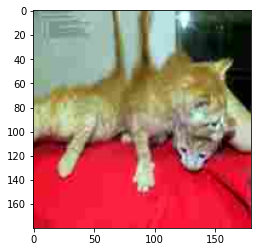

In [44]:
for data_batch, labels_batch in train_dataset.batch(32):
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break
n = 20
plt.imshow(data_batch[n,:,:,:]/255), "dog" if labels_batch[n] == 1 else "cat", labels_batch[n]

In [45]:
callback = [
    keras.callbacks.ModelCheckpoint(
        filepath="./cehckpoints/convnet_from_scratch.keras",
        save_best_only = True,
        monitor = "val_loss"
    )
]

history = model.fit(
    train_dataset.batch(32),
    epochs = 30,
    validation_data=validation_dataset.batch(32),
    callbacks=callback
)

63/63 [==============================] - 109s 2s/step - loss: 0.6979 - accuracy: 0.5070 - val_loss: 0.6896 - val_accuracy: 0.5030


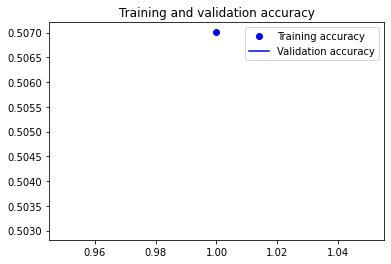

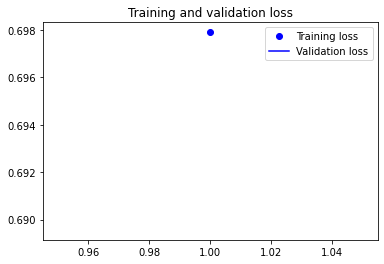

In [46]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()